Importamos los paquetes que vamos a usar

In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

En la base de datos tenemos los siguientes cambios de datos a valor numérico:

Estado civil:

    1 – Soltero/a

    2 – Casado/a

    3 – Viudo/a

    4 – Divorciado/a

    5 – Unión de hecho

    6 – Separado/a legalmente

Modo de aplicación:

    1 - 1ª fase - contingente general

    2 - Ordenanza N.º 612/93

    5 - 1ª fase - contingente especial (Isla de Azores)

    7 - Titulares de otros cursos superiores

    10 - Ordenanza N.º 854-B/99

    15 - Estudiante internacional (licenciatura)

    16 - 1ª fase - contingente especial (Isla de Madeira)

    17 - 2ª fase - contingente general

    18 - 3ª fase - contingente general

    26 - Ordenanza N.º 533-A/99, apartado b2) (Plan Diferente)

    27 - Ordenanza N.º 533-A/99, apartado b3 (Otra Institución)

    39 - Mayores de 23 años

    42 - Transferencia

    43 - Cambio de carrera

    44 - Titulares de diploma de especialización tecnológica

    51 - Cambio de institución/carrera

    53 - Titulares de diploma de ciclo corto

    57 - Cambio de institución/carrera (Internacional)

Orden de aplicación:

    Orden de solicitud (entre 0 - primera opción; y 9 - última opción)

Curso:

    33 - Tecnologías de Producción de Biocombustibles

    171 - Diseño de Animación y Multimedia

    8014 - Servicio Social (atención nocturna)

    9003 - Agronomía

    9070 - Diseño de Comunicación

    9085 - Enfermería Veterinaria

    9119 - Ingeniería Informática

    9130 - Equinicultura

    9147 - Gestión

    9238 - Servicio Social

    9254 - Turismo

    9500 - Enfermería

    9556 - Higiene Oral

    9670 - Gestión de Publicidad y Marketing

    9773 - Periodismo y Comunicación

    9853 - Educación Básica

    9991 - Gestión (atención nocturna)

Asistencia diurna/nocturna:

    1 – Diurna

    0 – Nocturna

Titulación previa:

    1 - Educación secundaria

    2 - Educación superior - licenciatura

    3 - Educación superior - grado

    4 - Educación superior - maestría

    5 - Educación superior - doctorado

    6 - Asistencia a la educación superior

    9 - 12º año de escolaridad - no completado

    10 - 11º año de escolaridad - no completado

    12 - Otro - 11º año de escolaridad

    14 - 10º año de escolaridad

    15 - 10º año de escolaridad - no completado

    19 - Educación básica 3er ciclo (9º/10º/11º año) o equivalente

    38 - Educación básica 2º ciclo (6º/7º/8º año) o equivalente

    39 - Curso de especialización tecnológica

    40 - Educación superior - grado (1º ciclo)

    42 - Curso técnico superior profesional

    43 - Educación superior - maestría (2º ciclo)

Titulación previa (grado):

    Calificación de la titulación previa (entre 0 y 200)

Nacionalidad:

    1 - Portugués

    2 - Alemán

    6 - Español

    11 - Italiano

    13 - Neerlandés

    14 - Inglés

    17 - Lituano

    21 - Angoleño

    22 - Caboverdiano

    24 - Guineano

    25 - Mozambiqueño

    26 - Santotomense

    32 - Turco

    41 - Brasileño

    62 - Rumano

    100 - Moldavo (República de Moldavia)

    101 - Mexicano

    103 - Ucraniano

    105 - Ruso

    108 - Cubano

    109 - Colombiano

Titulación de la madre:

    1 - Educación Secundaria - 12º Año de Escolaridad o Equivalente

    2 - Educación Superior - Licenciatura

    3 - Educación Superior - Grado

    4 - Educación Superior - Maestría

    5 - Educación Superior - Doctorado

    6 - Asistencia a la Educación Superior

    9 - 12º Año de Escolaridad - No Completado

    10 - 11º Año de Escolaridad - No Completado

    11 - 7º Año (Antiguo)

    12 - Otro - 11º Año de Escolaridad

    14 - 10º Año de Escolaridad

    18 - Curso de Comercio General

    19 - Educación Básica 3er Ciclo (9º/10º/11º Año) o Equivalente

    22 - Curso Técnico-Profesional

    26 - 7º Año de Escolaridad

    27 - 2º Ciclo del Curso General de Educación Secundaria

    29 - 9º Año de Escolaridad - No Completado

    30 - 8º Año de Escolaridad

    34 - Desconocido

    35 - No sabe leer ni escribir

    36 - Puede leer sin haber completado el 4º Año de Escolaridad

    37 - Educación Básica 1er Ciclo (4º/5º Año) o Equivalente

    38 - Educación Básica 2º Ciclo (6º/7º/8º Año) o Equivalente

    39 - Curso de Especialización Tecnológica

    40 - Educación Superior - Grado (1º Ciclo)

    41 - Curso de Estudios Superiores Especializados

    42 - Curso Técnico Superior Profesional

    43 - Educación Superior - Maestría (2º Ciclo)

    44 - Educación Superior - Doctorado (3º Ciclo)

Titulación del padre:

    1 - Educación Secundaria - 12º Año de Escolaridad o Equivalente

    2 - Educación Superior - Licenciatura

    3 - Educación Superior - Grado

    4 - Educación Superior - Maestría

    5 - Educación Superior - Doctorado

    6 - Asistencia a la Educación Superior

    9 - 12º Año de Escolaridad - No Completado

    10 - 11º Año de Escolaridad - No Completado

    11 - 7º Año (Antiguo)

    12 - Otro - 11º Año de Escolaridad

    13 - 2º Año del Curso Complementario de Educación Secundaria

    14 - 10º Año de Escolaridad

    18 - Curso de Comercio General

    19 - Educación Básica 3er Ciclo (9º/10º/11º Año) o Equivalente

    20 - Curso Complementario de Educación Secundaria

    22 - Curso Técnico-Profesional

    25 - Curso Complementario de Educación Secundaria - no concluido

    26 - 7º Año de Escolaridad

    27 - 2º Ciclo del Curso General de Educación Secundaria

    29 - 9º Año de Escolaridad - No Completado

    30 - 8º Año de Escolaridad

    31 - Curso General de Administración y Comercio

    33 - Contabilidad y Administración Suplementaria

    34 - Desconocido

    35 - No sabe leer ni escribir

    36 - Puede leer sin haber completado el 4º Año de Escolaridad

    37 - Educación Básica 1er Ciclo (4º/5º Año) o Equivalente

    38 - Educación Básica 2º Ciclo (6º/7º/8º Año) o Equivalente

    39 - Curso de Especialización Tecnológica

    40 - Educación Superior - Grado (1º Ciclo)

    41 - Curso de Estudios Superiores Especializados

    42 - Curso Técnico Superior Profesional

    43 - Educación Superior - Maestría (2º Ciclo)

    44 - Educación Superior - Doctorado (3º Ciclo)

Ocupación de la madre:

    0 - Estudiante

    1 - Representantes del Poder Legislativo y de los Órganos Ejecutivos, Directores, Gerentes y Directores Ejecutivos

    2 - Especialistas en Actividades Intelectuales y Científicas

    3 - Técnicos y Profesionales de Nivel Intermedio

    4 - Personal Administrativo

    5 - Trabajadores de Servicios Personales, Seguridad y Protección, y Vendedores

    6 - Agricultores y Trabajadores Calificados en Agricultura, Pesca y Silvicultura

    7 - Trabajadores Calificados en la Industria, Construcción y Artesanía

    8 - Operadores de Instalación y Maquinaria y Trabajadores de Ensamblaje

    9 - Trabajadores No Calificados

    10 - Profesiones de las Fuerzas Armadas

    90 - Otra Situación

    99 - (en blanco)

    122 - Profesionales de la Salud

    123 - Profesores

    125 - Especialistas en Tecnologías de la Información y la Comunicación (TIC)

    131 - Técnicos y Profesionales de Ciencias e Ingenierías de Nivel Intermedio

    132 - Técnicos y Profesionales de Nivel Intermedio en Salud

    134 - Técnicos de Nivel Intermedio de Servicios Legales, Sociales, Deportivos, Culturales y Similares

    141 - Trabajadores de Oficina, Secretarios en General y Operadores de Procesamiento de Datos

    143 - Operadores de Datos, Contabilidad, Estadística, Servicios Financieros y Registros

    144 - Otro Personal de Apoyo Administrativo

    151 - Trabajadores de Servicios Personales

    152 - Vendedores

    153 - Trabajadores de Cuidado Personal y similares

    171 - Trabajadores Calificados en Construcción y similares, excepto Electricistas

    173 - Trabajadores Calificados en Impresión, Fabricación de Instrumentos de Precisión, Joyeros, Artesanos y similares

    175 - Trabajadores en Procesamiento de Alimentos, Trabajo en Madera, Confección y otras Industrias y Artesanías

    191 - Trabajadores de Limpieza

    192 - Trabajadores No Calificados en Agricultura, Producción Animal, Pesca y Silvicultura

    193 - Trabajadores No Calificados en Industria Extractiva, Construcción, Manufactura y Transporte

    194 - Asistentes de Preparación de Comidas

Ocupación del padre:

    0 - Estudiante

    1 - Representantes del Poder Legislativo y de los Órganos Ejecutivos, Directores, Gerentes y Directores Ejecutivos

    2 - Especialistas en Actividades Intelectuales y Científicas

    3 - Técnicos y Profesionales de Nivel Intermedio

    4 - Personal Administrativo

    5 - Trabajadores de Servicios Personales, Seguridad y Protección, y Vendedores

    6 - Agricultores y Trabajadores Calificados en Agricultura, Pesca y Silvicultura

    7 - Trabajadores Calificados en la Industria, Construcción y Artesanía

    8 - Operadores de Instalación y Maquinaria y Trabajadores de Ensamblaje

    9 - Trabajadores No Calificados

    10 - Profesiones de las Fuerzas Armadas

    90 - Otra Situación

    99 - (en blanco)

    101 - Oficiales de las Fuerzas Armadas

    102 - Sargentos de las Fuerzas Armadas

    103 - Otro Personal de las Fuerzas Armadas

    112 - Directores de Servicios Administrativos y Comerciales

    114 - Directores de Servicios de Hotelería, Restauración, Comercio y Otros

    121 - Especialistas en Ciencias Físicas, Matemáticas, Ingeniería y Técnicas Relacionadas

    122 - Profesionales de la Salud

    123 - Profesores

    124 - Especialistas en Finanzas, Contabilidad, Organización Administrativa, Relaciones Públicas y Comerciales

    131 - Técnicos y Profesionales de Ciencias e Ingenierías de Nivel Intermedio

    132 - Técnicos y Profesionales de Nivel Intermedio en Salud

    134 - Técnicos de Nivel Intermedio de Servicios Legales, Sociales, Deportivos, Culturales y Similares

    135 - Técnicos en Tecnologías de la Información y la Comunicación

    141 - Trabajadores de Oficina, Secretarios en General y Operadores de Procesamiento de Datos

    143 - Operadores de Datos, Contabilidad, Estadística, Servicios Financieros y Registros

    144 - Otro Personal de Apoyo Administrativo

    151 - Trabajadores de Servicios Personales

    152 - Vendedores

    153 - Trabajadores de Cuidado Personal y similares

    154 - Personal de Servicios de Protección y Seguridad

    161 - Agricultores Orientados al Mercado y Trabajadores Calificados en Producción Agrícola y Animal

    163 - Agricultores, Ganaderos, Pescadores, Cazadores y Recolectores, de Subsistencia

    171 - Trabajadores Calificados en Construcción y similares, excepto Electricistas

    172 - Trabajadores Calificados en Metalurgia, Mecanizado y similares

    174 - Trabajadores Calificados en Electricidad y Electrónica

    175 - Trabajadores en Procesamiento de Alimentos, Trabajo en Madera, Confección y otras Industrias y Artesanías

    181 - Operadores de Plantas y Máquinas Fijas

    182 - Trabajadores de Ensamblaje

    183 - Conductores de Vehículos y Operadores de Equipos Móviles

    192 - Trabajadores No Calificados en Agricultura, Producción Animal, Pesca y Silvicultura

    193 - Trabajadores No Calificados en Industria Extractiva, Construcción, Manufactura y Transporte

    194 - Asistentes de Preparación de Comidas

    195 - Vendedores Ambulantes (excepto alimentos) y Proveedores de Servicios en la Calle

Nota de admisión:

    Calificación de admisión (entre 0 y 200)

Desplazado:

    1 – Sí

    0 – No

Necesidades educativas especiales:

    1 – Sí

    0 – No

Deudor/a:

    1 – Sí

    0 – No

Cuotas de matrícula actualizadas:

    1 – Sí

    0 – No

Género:

    1 – Hombre

    0 – Mujer

Beneficiario de beca:

    1 – Sí

    0 – No

Edad al momento de la matrícula:

    Edad del estudiante al momento de la matrícula

Internacional:

    1 – Sí

    0 – No

Unidades curriculares 1er semestre (acreditadas):

    Número de unidades curriculares acreditadas en el 1er semestre

Unidades curriculares 1er semestre (matriculadas):

    Número de unidades curriculares matriculadas en el 1er semestre

Unidades curriculares 1er semestre (evaluaciones):

    Número de unidades curriculares evaluaciones en el 1er semestre

Unidades curriculares 1er semestre (aprobadas):

    Número de unidades curriculares aprobadas en el 1er semestre

Unidades curriculares 1er semestre (calificación):

    Promedio de calificaciones en el 1er semestre (entre 0 y 20)

Unidades curriculares 1er semestre (sin evaluaciones):

    Número de unidades curriculares sin evaluaciones en el 1er semestre

Unidades curriculares 2er semestre (acreditadas):

    Número de unidades curriculares acreditadas en el 2er semestre

Unidades curriculares 2er semestre (matriculadas):

    Número de unidades curriculares matriculadas en el 2er semestre

Unidades curriculares 2er semestre (evaluaciones):

    Número de unidades curriculares evaluaciones en el 2er semestre

Unidades curriculares 2er semestre (aprobadas):

    Número de unidades curriculares aprobadas en el 2er semestre

Unidades curriculares 2er semestre (calificación):

    Promedio de calificaciones en el 2er semestre (entre 0 y 20)

Unidades curriculares 2er semestre (sin evaluaciones):

    Número de unidades curriculares sin evaluaciones en el 2er semestre

Tasa de desempleo:

    Tasa de desempleo (%)

Tasa de inflación:

    Tasa de inflación (%)

PIB:

    PIB

Objetivo:

    Objetivo. El problema se formula como una tarea de clasificación de tres categorías (deserción, matriculado y graduado) al final de la duración normal del curso.

Leemos el archivo .csv con pandas

In [407]:
df=pd.read_csv('data.csv',delimiter=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Hacemos un reescalado de los datos

In [408]:
print(df.head())
print(df.info())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

Asignamos valores a graduarse, matricularse y a abandonar

In [409]:
target_mapping={
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
}

df['Target'] = df['Target'].replace(target_mapping)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


Normalizamos los datos

In [410]:
from sklearn.preprocessing import StandardScaler
df1=df.drop(columns=['Target'])
columnas=df1.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columnas]=scaler.fit_transform(df[columnas])
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.000000,0.418605,0.255814,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.000000,0.000000,0.046512,...,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,2
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.000000,0.837209,0.837209,...,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.000000,0.860465,0.837209,...,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,2
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.000000,0.837209,0.860465,...,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.000000,0.666667,0.978108,1.0,0.0,0.315789,0.000000,0.000000,0.000000,...,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,2
4420,0.0,0.000000,0.222222,0.978108,1.0,0.0,0.263158,0.962963,0.000000,0.000000,...,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,0
4421,0.0,0.000000,0.111111,0.950693,1.0,0.0,0.621053,0.000000,0.837209,0.837209,...,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,0
4422,0.0,0.000000,0.111111,0.915244,1.0,0.0,0.894737,0.000000,0.837209,0.837209,...,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,2


Seleccionamos cuales serán los inputs y cual será el output

In [411]:
X=df.drop(columns=['Target'])

Y=df['Target']

Indicamos cual será el porcentaje de entrenamiento y cual será el porcentaje de test

In [412]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=100)

In [413]:
X_train.shape,Y_train.shape

((3096, 36), (3096,))

Creamos la red neuronal y la entrenamos

In [414]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [415]:
from tensorflow.keras.utils import to_categorical

Y_train_one_hot = to_categorical(Y_train, num_classes=3)

In [416]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    layers.Dropout(0.5), #En cada época anulamos la mitad de las neuronas para evitar el overfitting
    layers.Dense(32, activation='relu'), 
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [417]:
historial = model.fit(X_train,Y_train_one_hot, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
78/78 [==============================] - 1s 5ms/step - loss: 1.0737 - accuracy: 0.4479 - val_loss: 0.9751 - val_accuracy: 0.5306
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.9723 - accuracy: 0.5610 - val_loss: 0.8811 - val_accuracy: 0.6903
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.6175 - val_loss: 0.7962 - val_accuracy: 0.7097
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.8529 - accuracy: 0.6490 - val_loss: 0.7310 - val_accuracy: 0.7129
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.8226 - accuracy: 0.6757 - val_loss: 0.7126 - val_accuracy: 0.7274
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.7928 - accuracy: 0.6830 - val_loss: 0.6858 - val_accuracy: 0.7371
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.6943 - val_loss: 0.6669 - val_accuracy: 0.7355
Epoch 8/100
7

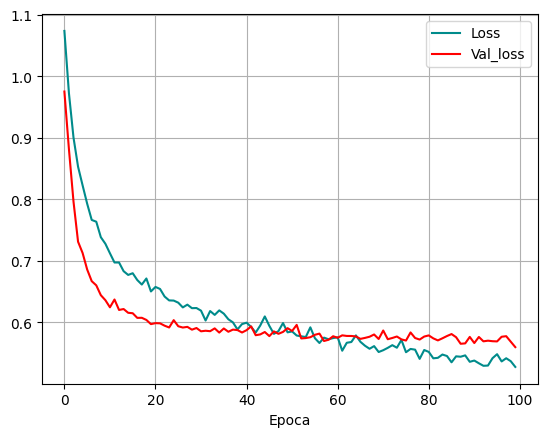

In [418]:
plt.figure(1)
plt.xlabel('Epoca')
plt.plot(historial.history['loss'],'darkcyan',label='Loss')
plt.plot(historial.history['val_loss'],'r',label='Val_loss')
plt.grid()
plt.legend()

In [419]:
resultado=model.predict(X_test)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

42/42 [==============================] - 0s 1ms/step


In [420]:
for i in range(resultado.shape[0]):
    x=np.argmax(resultado[i])
    for j in range(resultado.shape[1]):
        if j==x:
            resultado[i,j]=1
        else:
            resultado[i,j]=0


Evaluamos la red neuronal

In [421]:
res=[]
for i in range(resultado.shape[0]):
    for j in range(resultado.shape[1]):
        if resultado[i,j]==1:
            res.append(j)

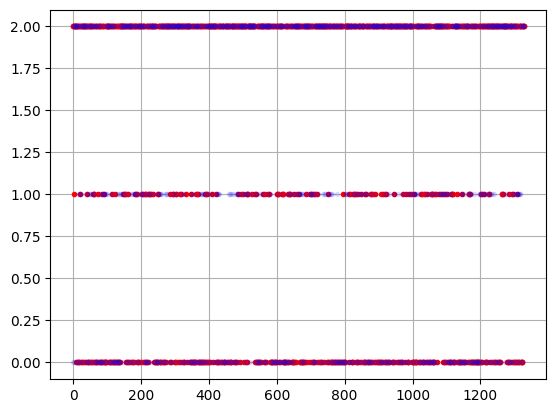

In [422]:
x_fun=np.linspace(0,len(X_test),len(X_test))
plt.figure(2)
plt.plot(x_fun,res,'r.',alpha=1)
plt.plot(x_fun,Y_test,'b.',alpha=0.1)
plt.grid()


In [435]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, res)
print(conf_matrix)
value=sum(np.diag(conf_matrix))/sum(sum(conf_matrix))*100
print(f"Porcentaje de acierto: {value:.2f}%")

[[309  37  57]
 [ 64  72 111]
 [ 24  35 619]]
Porcentaje de acierto: 75.30%
